In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme('paper')

In [137]:
df = pd.read_csv('Social_Network_Ads.csv')

In [138]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [139]:
df = df.iloc[:,2:]

In [140]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## For feature scaling we should always do train test split

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

In [142]:
X_train.shape , X_test.shape

((280, 2), (120, 2))

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
# Now I have to fit the standard scalar on the training data and transform on the test data.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [145]:
# I can check the learnt mean and STD for both.
print(f'mean: {scaler.mean_} \n standar deviation {scaler.var_}')

mean: [3.78642857e+01 6.98071429e+04] 
 standar deviation [1.04038724e+02 1.19572709e+09]


In [146]:
X_train_scaled = scaler.transform(X_train) # these are numpy arrays so I will make them pandas data frame
X_test_scaled = scaler.transform(X_test)

In [147]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

### Visualizing both

<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

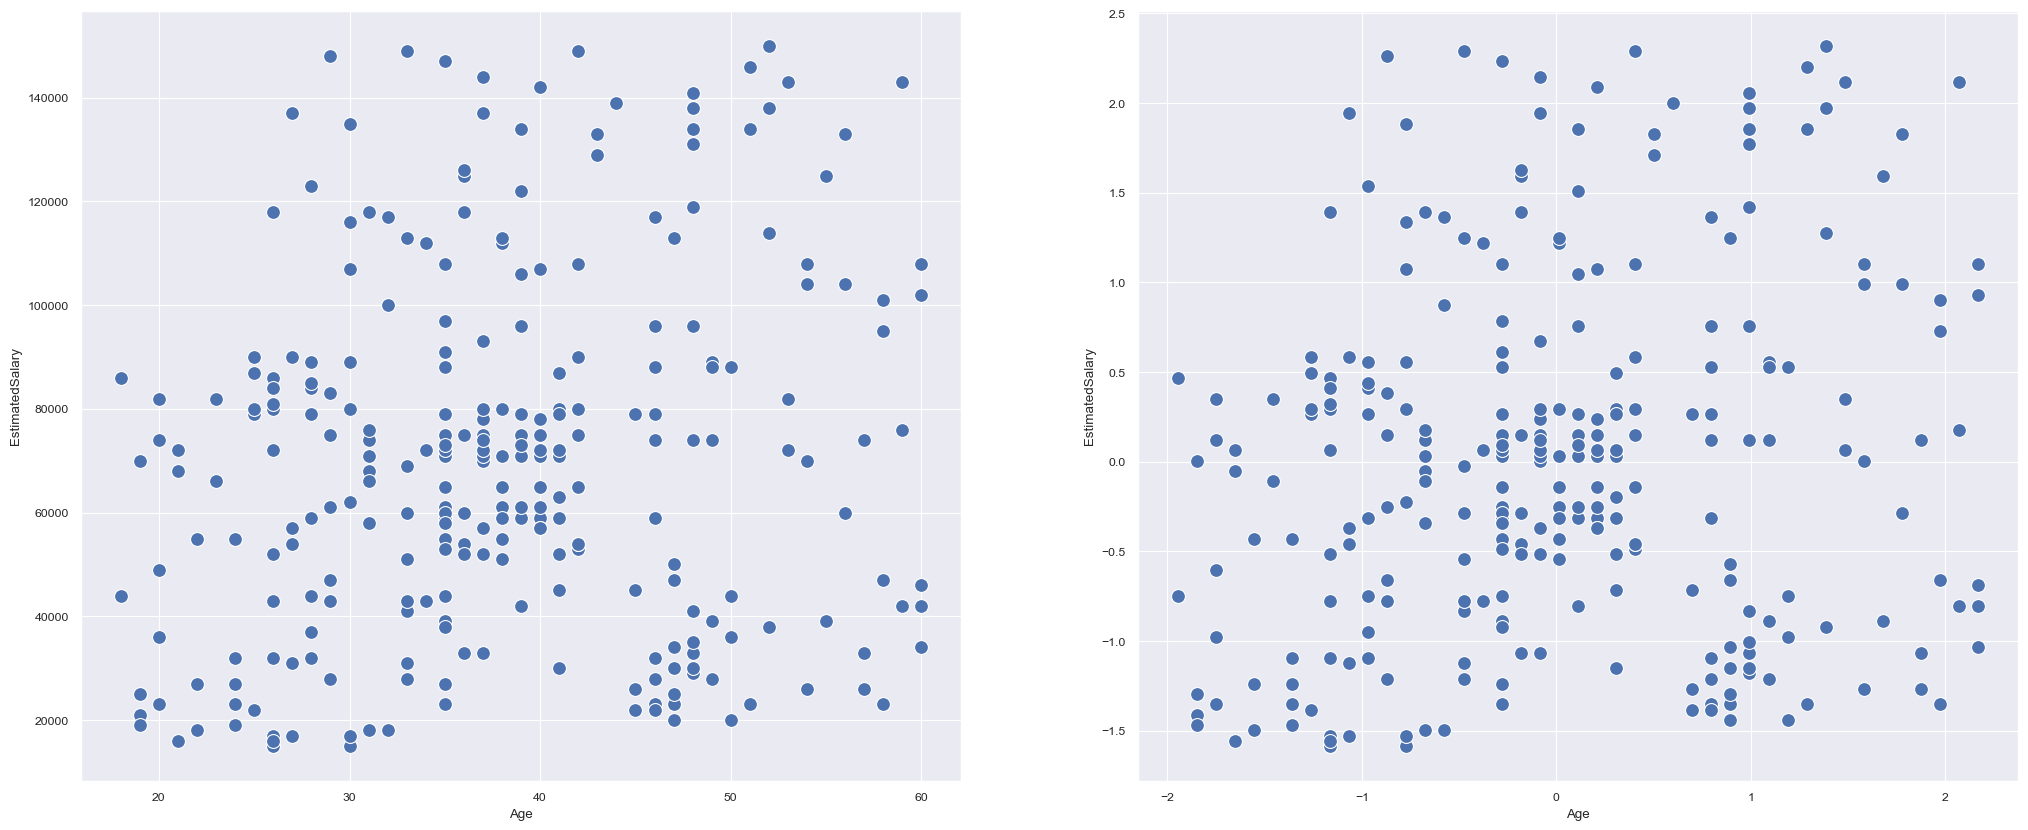

In [148]:
plt.subplots(1,2,figsize=(25,10))
plt.subplot(121)
sns.scatterplot(data=X_train,x='Age',y='EstimatedSalary',s=100)
plt.subplot(122)
sns.scatterplot(data=X_train_scaled,x='Age',y='EstimatedSalary',s=100)

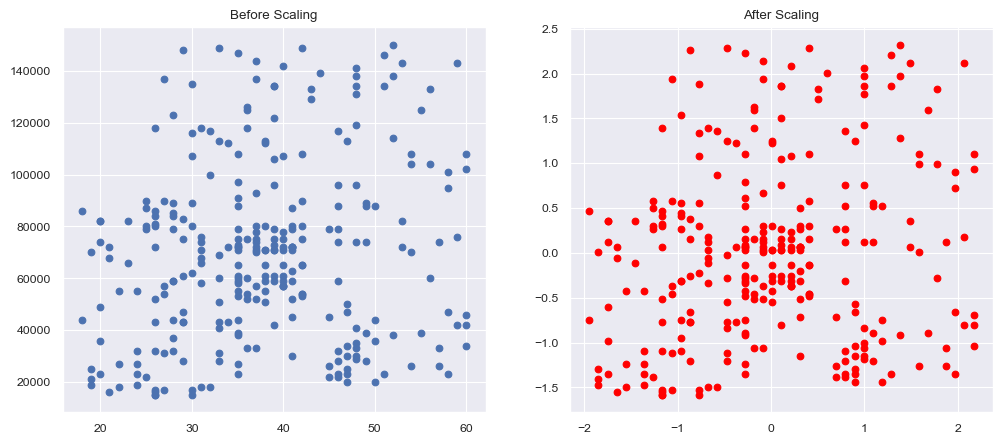

In [149]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
# ax1.axline(0)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

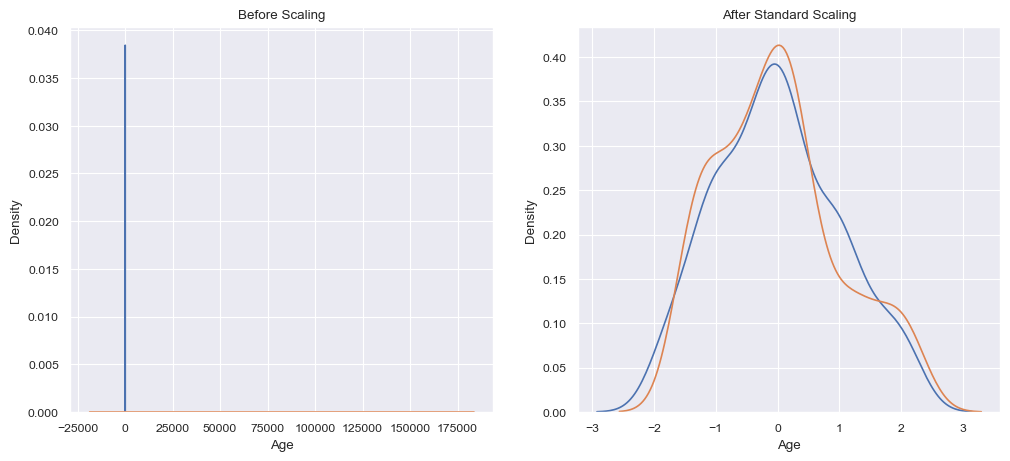

In [150]:
# Now visualization of the data
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Comparision of distribution before and after scaling.

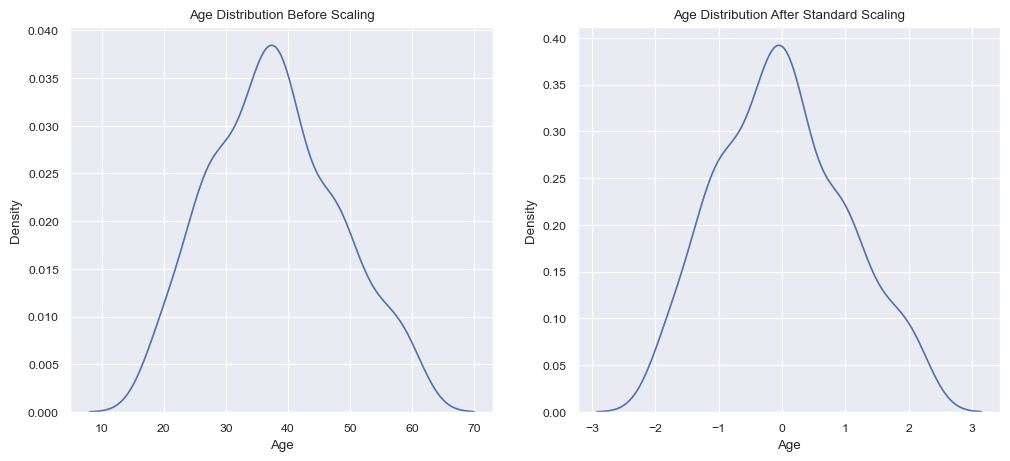

In [151]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

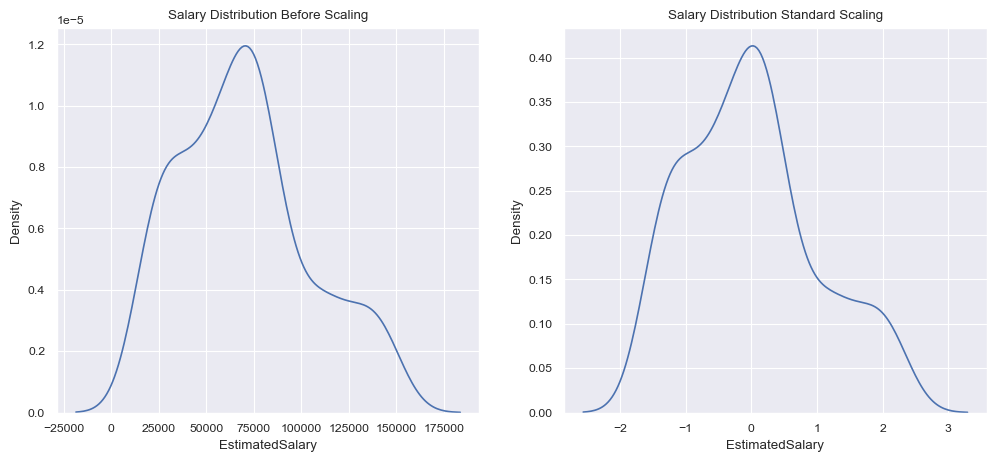

In [152]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# It is exactly same.

### Now to see the importance of scaling I will train a `Logistic regression model`

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [155]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [156]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [157]:
from sklearn.metrics import accuracy_score

In [158]:
print(f'Not scaled data accuracy {accuracy_score(y_test,y_pred)} \n Scaled data accuracy {accuracy_score(y_test,y_pred_scaled)}')

Not scaled data accuracy 0.6583333333333333 
 Scaled data accuracy 0.8666666666666667


## Here it's clearly visible after just standardization the accuracy has increased by 20%

# This technique does affect outliers, Which means the outliers remain as the were originally.